## Steps: 

1. Use GridSearchCV & RandomizedSearchCV to optimize model hyperparameters. 
2. Compare optimized models with baseline performance.

In [1]:
# Load the data
import pandas as pd

# df = pd.read_csv("../data/selected_features_heart_disease.csv")
df = pd.read_csv("../data/processed_heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,-0.721976,2,0
1,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,1.411625,3,1
2,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,-0.721976,1,0
3,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,-0.721976,1,0
4,0.161372,1,2,-0.659431,-0.218651,0,0,1.240047,0,-0.219520,1,-0.721976,1,0


## 1. Use GridSearchCV & RandomizedSearchCV to optimize model hyperparameters. 

### 1.1 Using GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(lr, lr_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

f:\Omar\Internships\Sprints\Project\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [4]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_lr_grid = grid_search.best_estimator_
test_score = best_lr_grid.score(X_test, y_test)
print("Test set score: ", test_score)

Best parameters found:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:  0.826945412311266
Test set score:  0.9245283018867925


## 1.2 Using RandomizedSearchCV

In [5]:
from sklearn.model_selection import RandomizedSearchCV

lr_param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

random_search = RandomizedSearchCV(lr, lr_param_dist, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_distributions,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [6]:
print("Best RandomizedSearchCV score:", random_search.best_score_)
print("Best RandomizedSearchCV params:", random_search.best_params_)

Best RandomizedSearchCV score: 0.8126596980255517
Best RandomizedSearchCV params: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 10}


In [7]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with RandomizedSearchCV:", accuracy)

Test set accuracy with RandomizedSearchCV: 0.8490566037735849


## 2. Compare optimized models with baseline performance.

In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

threshold = 0.4   # <-- lower than 0.5 to increase recall

# Baseline predictions (train and test)
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Train set
y_probs_train = baseline_model.predict_proba(X_train)[:, 1]
baseline_pred_train = (y_probs_train >= threshold).astype(int)
baseline_accuracy_train = baseline_model.score(X_train, baseline_pred_train)
baseline_f1_train = f1_score(y_train, baseline_pred_train)
baseline_precision_train = precision_score(y_train, baseline_pred_train)
baseline_recall_train = recall_score(y_train, baseline_pred_train)
baseline_auc_roc_train = roc_auc_score(y_train, y_probs_train)

# Test set
y_probs = baseline_model.predict_proba(X_test)[:, 1]
baseline_pred = (y_probs >= threshold).astype(int)
baseline_accuracy = baseline_model.score(X_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)
baseline_precision = precision_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)
baseline_auc_roc = roc_auc_score(y_test, y_probs)

# GridSearchCV predictions (train and test)
grid_y_probs_train = grid_search.predict_proba(X_train)[:, 1]
grid_pred_train = (grid_y_probs_train >= threshold).astype(int)
grid_accuracy_train = grid_search.score(X_train, grid_pred_train)
grid_f1_train = f1_score(y_train, grid_pred_train)
grid_precision_train = precision_score(y_train, grid_pred_train)
grid_recall_train = recall_score(y_train, grid_pred_train)
grid_auc_roc_train = roc_auc_score(y_train, grid_y_probs_train)

grid_y_probs = grid_search.predict_proba(X_test)[:, 1]
grid_pred = (grid_y_probs >= threshold).astype(int)
grid_accuracy = grid_search.score(X_test, grid_pred)
grid_f1 = f1_score(y_test, grid_pred)
grid_precision = precision_score(y_test, grid_pred)
grid_recall = recall_score(y_test, grid_pred)
grid_auc_roc = roc_auc_score(y_test, grid_y_probs)

# RandomizedSearchCV predictions (train and test)
random_y_probs_train = random_search.predict_proba(X_train)[:, 1]
random_pred_train = (random_y_probs_train >= threshold).astype(int)
random_accuracy_train = random_search.score(X_train, random_pred_train)
random_f1_train = f1_score(y_train, random_pred_train)
random_precision_train = precision_score(y_train, random_pred_train)
random_recall_train = recall_score(y_train, random_pred_train)
random_auc_roc_train = roc_auc_score(y_train, random_y_probs_train)

random_y_probs = random_search.predict_proba(X_test)[:, 1]
random_pred = (random_y_probs >= threshold).astype(int)
random_accuracy = random_search.score(X_test, random_pred)
random_f1 = f1_score(y_test, random_pred)
random_precision = precision_score(y_test, random_pred)
random_recall = recall_score(y_test, random_pred)
random_auc_roc = roc_auc_score(y_test, random_y_probs)

# Create a DataFrame for train and test results
results_df = pd.DataFrame({
      'Model': ['Baseline', 'GridSearchCV', 'RandomizedSearchCV'],
      'Train Accuracy': [baseline_accuracy_train, grid_accuracy_train, random_accuracy_train],
      'Train F1 Score': [baseline_f1_train, grid_f1_train, random_f1_train],
      'Train Precision': [baseline_precision_train, grid_precision_train, random_precision_train],
      'Train Recall': [baseline_recall_train, grid_recall_train, random_recall_train],
      'Train AUC-ROC': [baseline_auc_roc_train, grid_auc_roc_train, random_auc_roc_train],
      'Test Accuracy': [baseline_accuracy, grid_accuracy, random_accuracy],
      'Test F1 Score': [baseline_f1, grid_f1, random_f1],
      'Test Precision': [baseline_precision, grid_precision, random_precision],
      'Test Recall': [baseline_recall, grid_recall, random_recall],
      'Test AUC-ROC': [baseline_auc_roc, grid_auc_roc, random_auc_roc]
})
results_df.T

,0,1,2
Model,Baseline,GridSearchCV,RandomizedSearchCV
Train Accuracy,0.961538,0.942308,0.956731
Train F1 Score,0.80226,0.795455,0.808989
Train Precision,0.797753,0.795455,0.8
Train Recall,0.806818,0.795455,0.818182
Train AUC-ROC,0.92197,0.912973,0.923958
Test Accuracy,0.962264,0.943396,0.924528
Test F1 Score,0.869565,0.888889,0.875
Test Precision,0.833333,0.869565,0.807692
Test Recall,0.909091,0.909091,0.954545


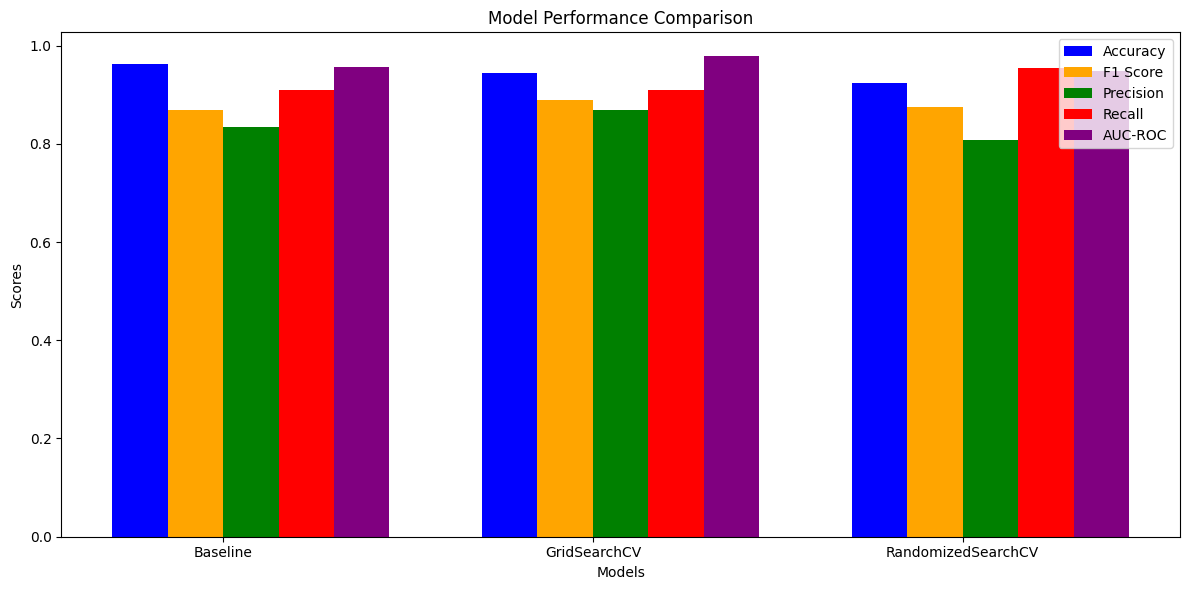

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Baseline', 'GridSearchCV', 'RandomizedSearchCV']

# Metrics
accuracies = np.array([baseline_accuracy, grid_accuracy, random_accuracy])
f1_scores = np.array([baseline_f1, grid_f1, random_f1])
precisions = np.array([baseline_precision, grid_precision, random_precision])
recalls = np.array([baseline_recall, grid_recall, random_recall])
auc_rocs = np.array([baseline_auc_roc, grid_auc_roc, random_auc_roc])

# Bar width and positions
width = 0.15
x = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='blue')
plt.bar(x - 0.5 * width, f1_scores, width, label='F1 Score', color='orange')
plt.bar(x + 0.5 * width, precisions, width, label='Precision', color='green')
plt.bar(x + 1.5 * width, recalls, width, label='Recall', color='red')
plt.bar(x + 2.5 * width, auc_rocs, width, label='AUC-ROC', color='purple')

# Formatting
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
best_model = baseline_model
print("Best model: ", best_model)

Best model:  LogisticRegression()


## Save the best model for deployment

### Create the pipeline (preprocessing + model)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

categorical_features = ['cp', 'exang', 'thal', 'sex', 'ca', 'fbs', 'restecg', 'slope']
numerical_features = ['age', 'trestbps', 'chol', 'oldpeak', 'thalach']

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = Pipeline([
    ('num', num_pipeline),
    ('cat', cat_pipeline)
])

final_model = Pipeline([
    ('preprocessing', full_pipeline),
    ('classifier', LogisticRegression(C=0.1, solver='saga'))
])

In [12]:
X = df.drop('num', axis=1)
y = df['num']

final_model.fit(X, y)
y_proba = final_model.predict_proba(X)
y_pred = (y_proba[:, 1] > 0.3).astype(int)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
auc_roc = roc_auc_score(y, final_model.predict_proba(X)[:, 1])

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", auc_roc)

Accuracy Score: 0.8275862068965517
Precision Score: 0.7304964539007093
Recall Score: 0.9363636363636364
F1 Score: 0.8207171314741036
AUC-ROC Score: 0.9469596628537026


### Save the results of the final model

In [13]:
import os

os.makedirs('../results', exist_ok=True)

path = os.path.join('../results', 'evaluation_metrics.txt')
with open(path, 'w') as f:
    f.write("Final Model (Logistic Regression):\n")
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"AUC-ROC: {auc_roc:.4f}\n")

print(f"Evaluation metrics saved to {path}")

Evaluation metrics saved to ../results\evaluation_metrics.txt


In [14]:
import joblib

MODEL_PATH = "../models/final_model.pkl"
joblib.dump(final_model, MODEL_PATH)
print(f"Final model saved to {MODEL_PATH}")

Final model saved to ../models/final_model.pkl
